In [56]:
import pandas as pd
import numpy as np
import seaborn as sns 

from scipy import stats
from calendar import month_abbr
from matplotlib import pyplot as plt

from statsmodels.tsa.seasonal import STL, seasonal_decompose

### 1.0. GDP Economy

In [39]:
df = pd.read_csv("../data/global_economy.csv", index_col=[0])

df["PGDP"] = df["GDP"] / df["Population"]

In [36]:
print(df.Code.unique().shape)

df.PGDP.describe()

(263,)


count     11825.000000
mean       7291.112150
std       14711.138534
min          34.741428
25%         490.307698
50%        1680.705623
75%        6651.122420
max      185152.527227
Name: PGDP, dtype: float64

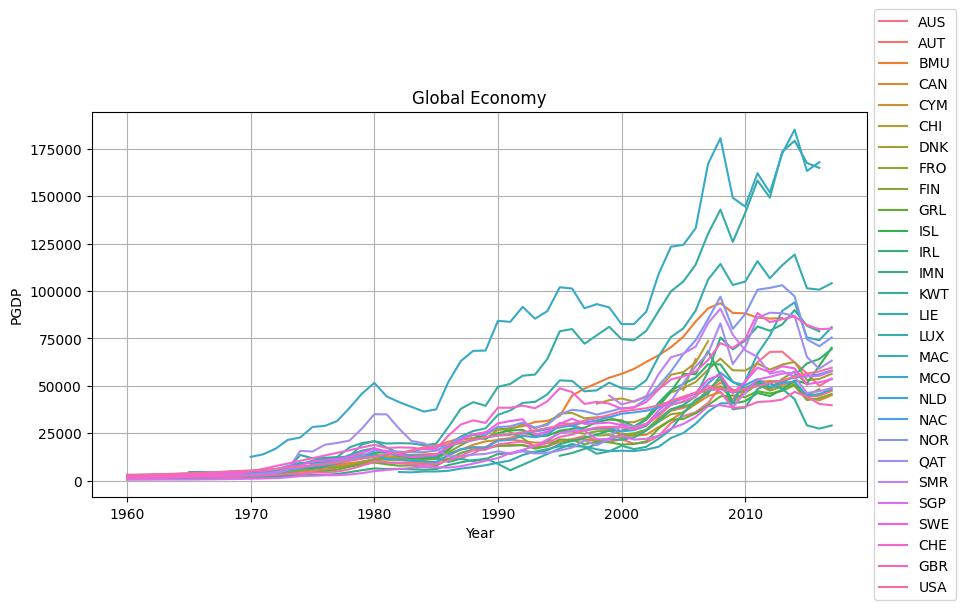

In [56]:
dff = df[df.Code.isin(df.loc[df.PGDP >= 50000, "Code"].unique())]

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=dff, x="Year", y="PGDP", hue="Code")
ax.grid(2)
ax.set_title("Global Economy");
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

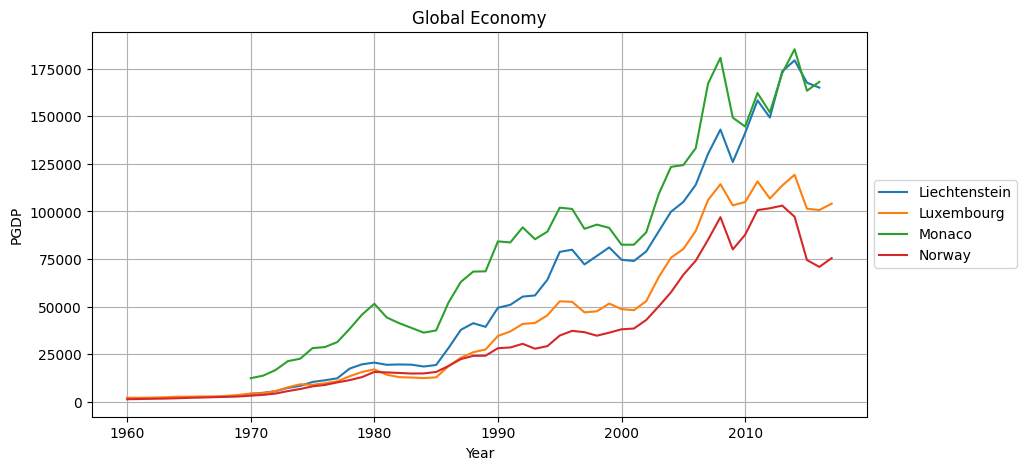

In [58]:
dff = df[df.Code.isin(df.loc[df.PGDP >= 100000, "Code"].unique())]

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=dff, x="Year", y="PGDP", hue="Country")
ax.grid(2)
ax.set_title("Global Economy");
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### 2.0. Make Graph

#### 2.1. US GDP

A Visão per capita não mostra nada a não ser o mesmo padrão visto anteriormente só que em uma escala diferente, nota-se que a população do US cresce e o GDP também. Agora no log não apresenta nenhum comportamento sem ser a tendência. 

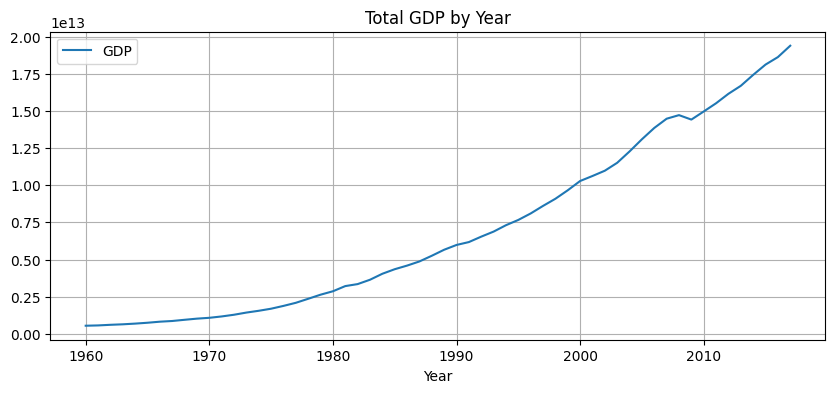

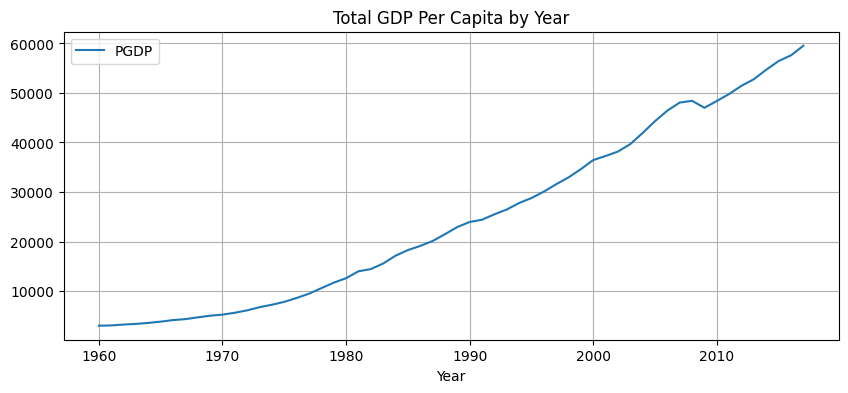

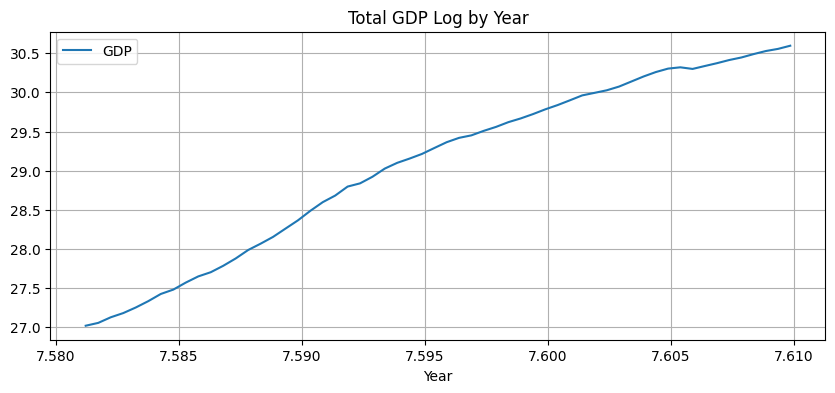

In [87]:
df[df["Code"] == "USA"].plot(x="Year", y="GDP", grid=2, figsize=(10, 4), title="Total GDP by Year");
df[df["Code"] == "USA"].plot(x="Year", y="PGDP", grid=2, figsize=(10, 4), title="Total GDP Per Capita by Year");
np.log1p(df.loc[df["Code"] == "USA", ["GDP", "Year"]]).set_index("Year").plot(y="GDP", grid=2, figsize=(10, 4), title="Total GDP Log by Year");

#### 2.2. Aus Livestock

Is possible to do a calendar adjustment or resampling to yearly data to see more smooth series, or can use a log to remove the "heteroscedasticity" but its not look so good =D

In [90]:
df = pd.read_csv("../data/aus_livestock.csv", index_col=[0])

df["Month"] = pd.to_datetime(df["Month"], format="%Y %b")

df = df[df["Animal"] == "Bulls, bullocks and steers"].reset_index(drop=True)

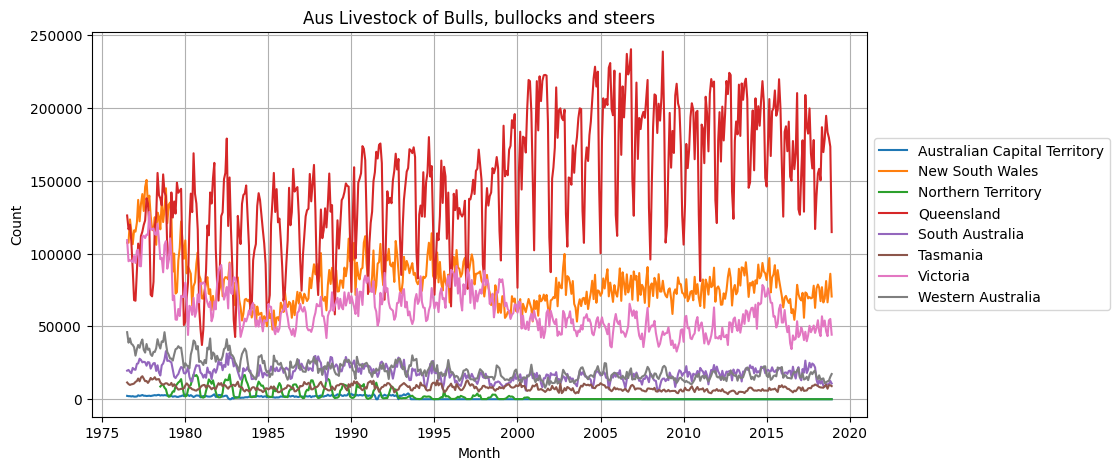

In [95]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df, x="Month", y="Count", hue="State")
ax.grid(2)
ax.set_title("Aus Livestock of Bulls, bullocks and steers");
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

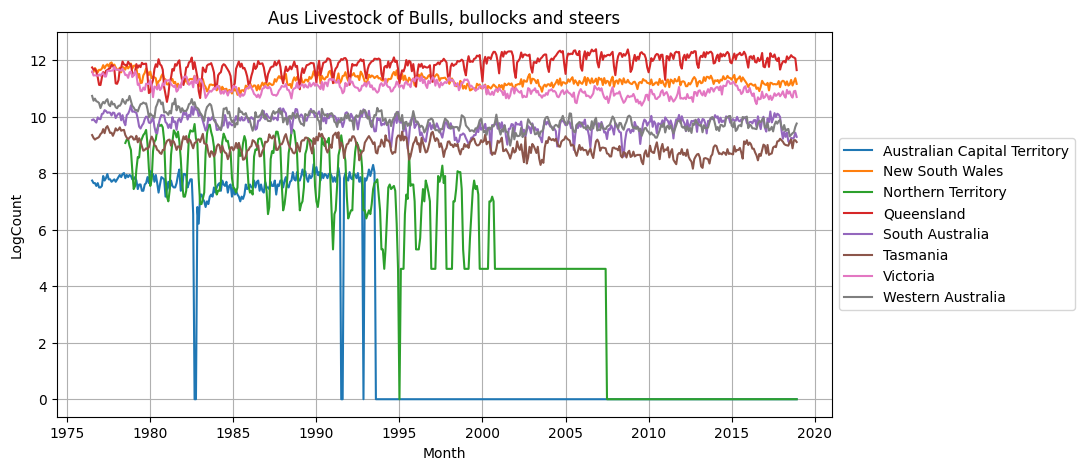

In [133]:
df["LogCount"] = np.log1p(df["Count"])

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df, x="Month", y="LogCount", hue="State")
ax.grid(2)
ax.set_title("Aus Livestock of Bulls, bullocks and steers");
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

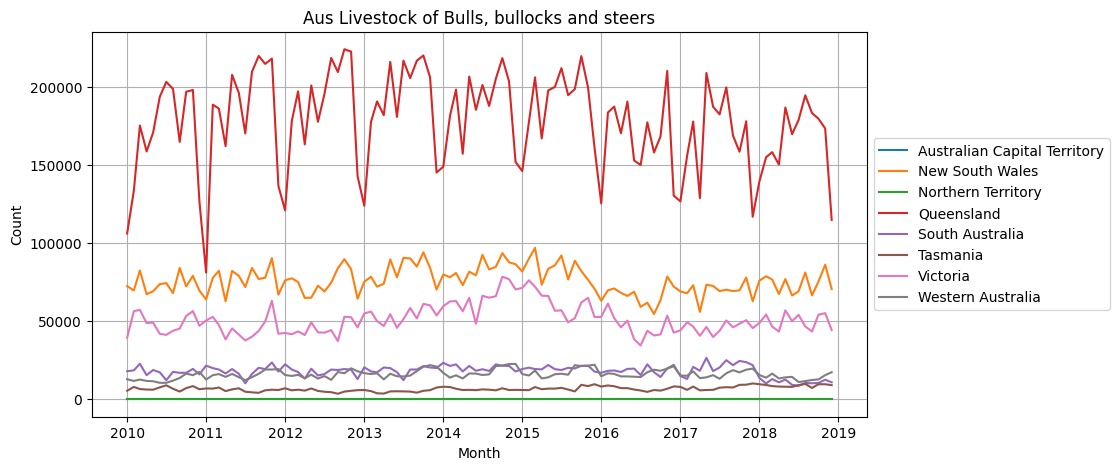

In [96]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df[df["Month"] >= "2010-01-01"], x="Month", y="Count", hue="State")
ax.grid(2)
ax.set_title("Aus Livestock of Bulls, bullocks and steers");
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [123]:
dff = pd.DataFrame()

for state in df["State"].unique():
    df1 = df[df.State == state]
    df1 = pd.DataFrame(df1.set_index("Month")["Count"].resample("Y").sum()).reset_index()
    df1 = df1.sort_values(by="Month").reset_index(drop=True)
    df1 = df1.rename(columns={"Month": "Year"})
    df1["State"] = state

    dff = pd.concat([dff, df1], axis=0)

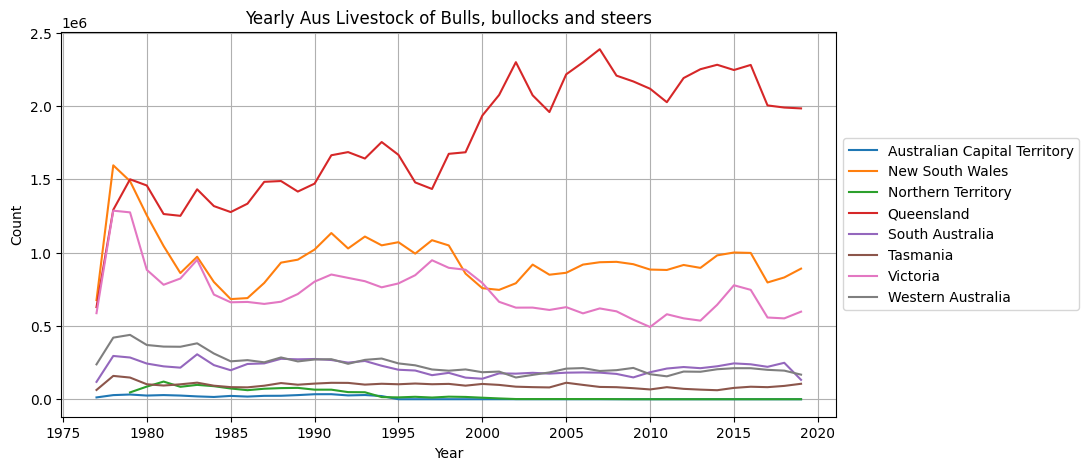

In [128]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=dff, x="Year", y="Count", hue="State")
ax.grid(2)
ax.set_title("Yearly Aus Livestock of Bulls, bullocks and steers");
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

#### 2.3. Vic Elec

I have explored much vic elec on chap 2.

#### 2.4. Gas Production

Gas behavior changed a lot, very old data is little irrelevant for forecast because is just show a up trend, if i just filter the dataset for view more recent observations maybe i do not need any transformation for future decomposition.
Is possible to see two special quarters on start of 2000's, maybe a special event on gas or new techs... 

In [160]:
df = pd.read_csv("../data/aus_production.csv", index_col=[0])

df['Quarter'] = df['Quarter'].apply(lambda x: x.replace(' ', '-'))
df['Quarter'] = pd.PeriodIndex(df['Quarter'], freq='Q')

In [161]:
dff = df[df["Quarter"] >= "1990-01-01"]

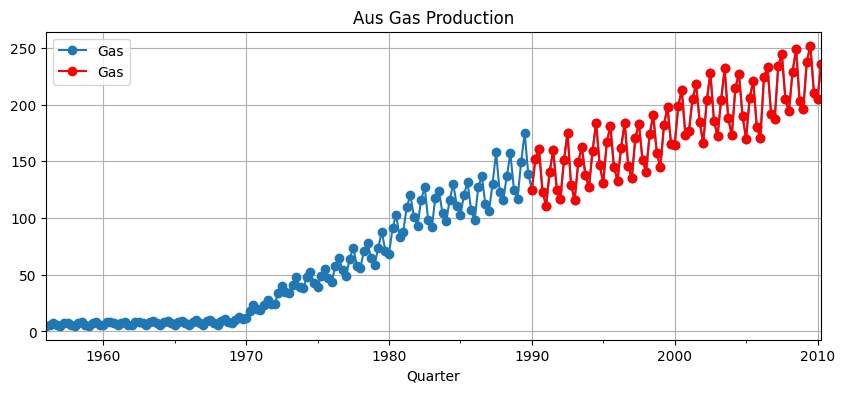

In [162]:
ax = df.plot(
    x="Quarter", y="Gas", 
    grid=2, figsize=(10,4),
    title="Aus Gas Production",
    marker="o"
);
dff.plot(
    x="Quarter", y="Gas", 
    grid=2, figsize=(10,4),
    title="Aus Gas Production",
    marker="o", color="r", ax=ax
);

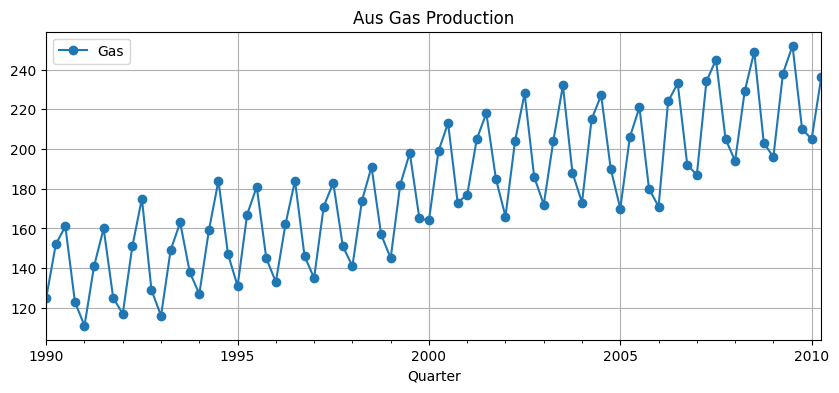

In [163]:
dff.plot(
    x="Quarter", y="Gas", 
    grid=2, figsize=(10,4),
    title="Aus Gas Production",
    marker="o"
);

### 3.0. Canadian Gas

After, maybe 1994, at first view, the series looks white noise, but on subseries its show a pattern, I use boxcox for reduce heteroscedasticity on serie, and i use a lambda of 0.1.

In [167]:
df = pd.read_csv("../data/canadian_gas.csv", index_col=[0])

df["Month"] = pd.to_datetime(df["Month"], format="%Y %b")

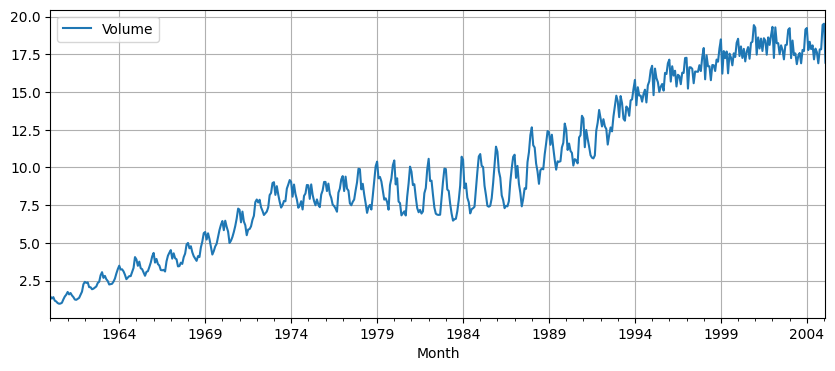

In [171]:
df.plot(
    x="Month", y="Volume",
    grid=2, figsize=(10, 4)
);

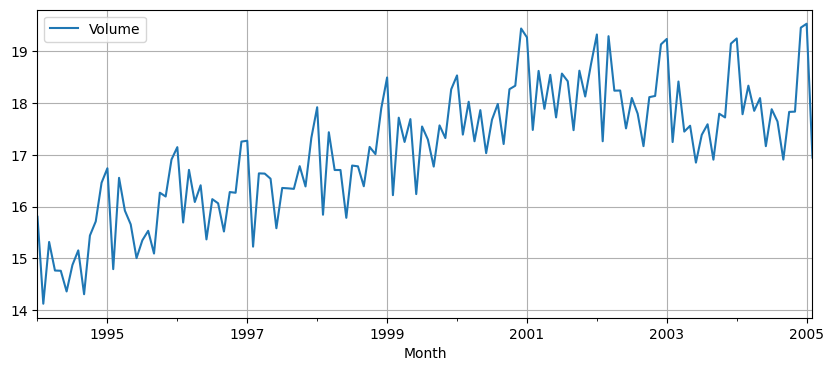

In [197]:
dff = df[df["Month"] >= "1994-01-01"].reset_index(drop=True)
dff["MonthAbbr"] = dff["Month"].dt.month.apply(lambda x: month_abbr[x])

dff.plot(
    x="Month", y="Volume",
    grid=2, figsize=(10, 4)
);

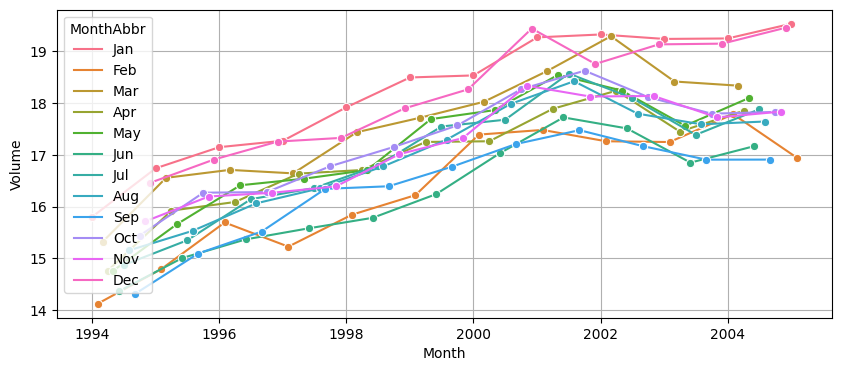

In [202]:
fgi, ax = plt.subplots(figsize=(10,4))
ax.grid(2)
sns.lineplot(dff, x="Month", y="Volume", hue="MonthAbbr", marker="o");

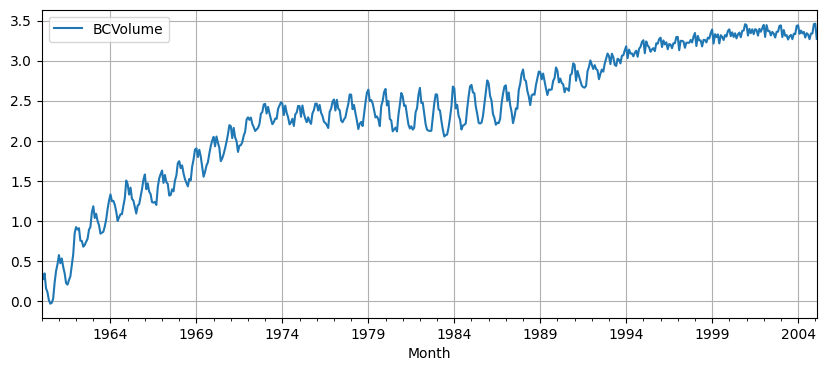

In [185]:
obs = stats.boxcox(df["Volume"], lmbda=0.1)

df["BCVolume"] = obs

df.plot(
    x="Month", y="BCVolume",
    grid=2, figsize=(10, 4)
);

### 4.0. Monthly Australian retail data

To reduce the heteroskedasticity and make additive series.

In [3]:
np.random.seed(12345678)

df = pd.read_csv("../data/aus_retail.csv", index_col=[0])

df = df[df["Series ID"].isin(df["Series ID"].sample(1).values)]

df["Month"] = pd.to_datetime(df["Month"], format="%Y %b")

df.reset_index(drop=True, inplace=True)

df.head()

,State,Industry,Series ID,Month,Turnover
0,South Australia,Household goods retailing,A3349503T,1982-04-01,39.7
1,South Australia,Household goods retailing,A3349503T,1982-05-01,45.7
2,South Australia,Household goods retailing,A3349503T,1982-06-01,43.9
3,South Australia,Household goods retailing,A3349503T,1982-07-01,49.3
4,South Australia,Household goods retailing,A3349503T,1982-08-01,48.9


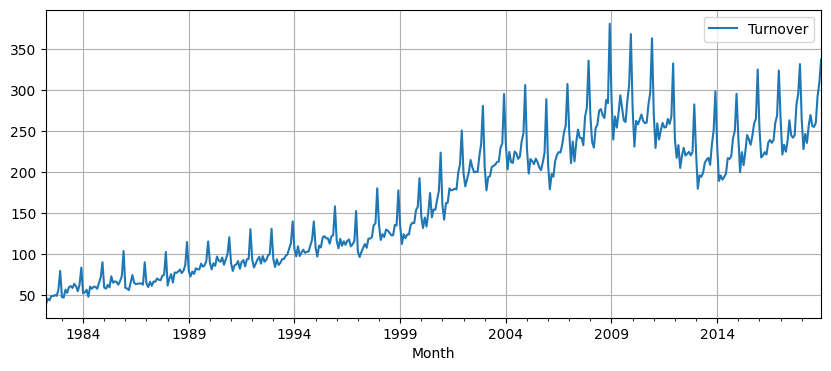

In [4]:
df.plot(
    x="Month", y="Turnover",
    grid=2, figsize=(10,4)
);

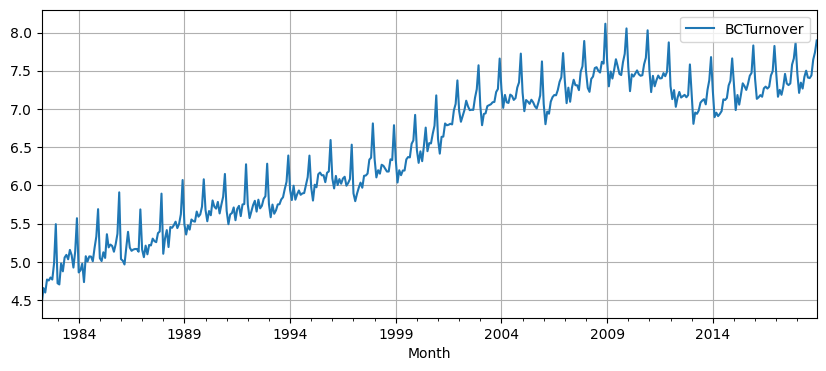

In [11]:
df["BCTurnover"] = stats.boxcox(df["Turnover"], lmbda=0.10)

df.plot(x="Month", y="BCTurnover", grid=2, figsize=(10, 4));

### 5.0. Find Ideal Lambda

#### 5.1. Aus Production

In [13]:
df = pd.read_csv("../data/aus_production.csv", index_col=[0])

df['Quarter'] = df.Quarter.apply(lambda x: x.replace(' ', '-'))
df['Quarter'] = pd.PeriodIndex(df.Quarter, freq='Q').to_timestamp()

df.dropna(subset="Tobacco", inplace=True)

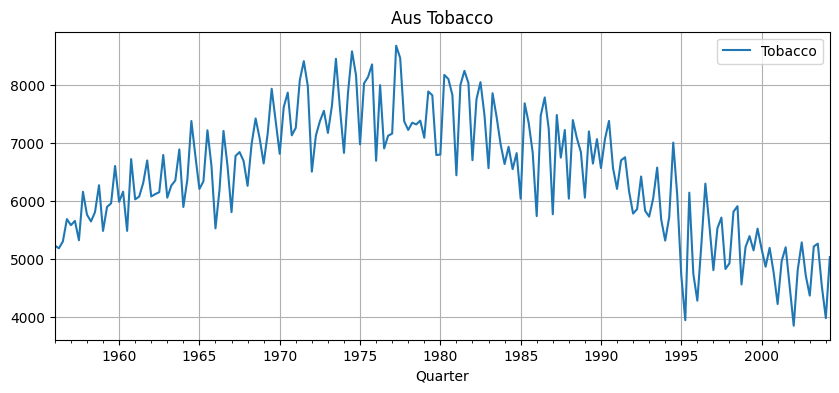

In [36]:
df.plot(x="Quarter", y="Tobacco", grid=2, figsize=(10,4), title=f"Aus Tobacco");

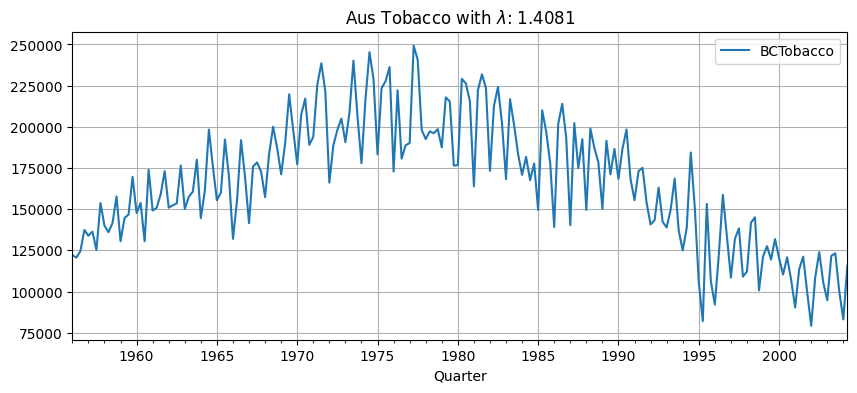

In [35]:
bc, lmbda = stats.boxcox(df["Tobacco"])

df["BCTobacco"] = bc

df.plot(x="Quarter", y="BCTobacco", grid=2, figsize=(10,4), title=f"Aus Tobacco with $\lambda$: {lmbda:.4f}");

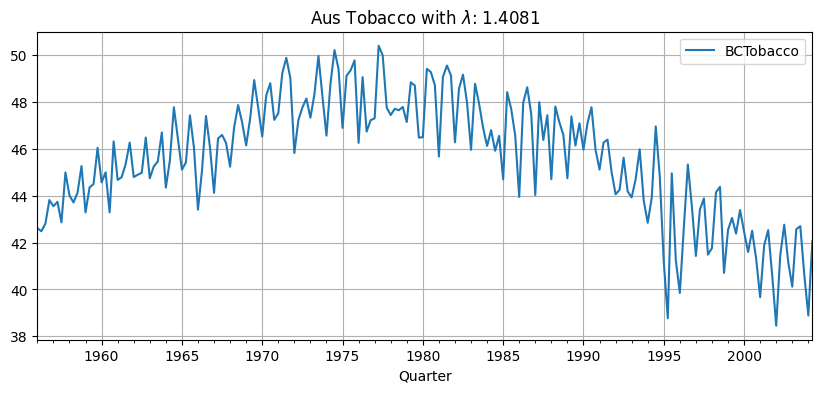

In [38]:
bc = stats.boxcox(df["Tobacco"], lmbda=0.31)

df["BCTobacco"] = bc

df.plot(x="Quarter", y="BCTobacco", grid=2, figsize=(10,4), title=f"Aus Tobacco with $\lambda$: {lmbda:.4f}");

### 6.0. 3 × 5 MA is equivalent to a 7-term weighted moving average

### 7.0. Aus Production

In [41]:
df = pd.read_csv("../data/aus_production.csv", index_col=[0])
df['Quarter'] = df.Quarter.apply(lambda x: x.replace(' ', '-'))
df['Quarter'] = pd.PeriodIndex(df.Quarter, freq='Q').to_timestamp()

df = df.tail((5 * 4) + 2).set_index("Quarter")

In [52]:
df.head()

,Beer,Tobacco,Bricks,Cement,Electricity,Gas
Quarter,,,,,,
2005-01-01,416,NaN,355.0,1980,55035,170
2005-04-01,403,NaN,435.0,2481,55117,206
2005-07-01,408,NaN,NaN,2340,56043,221
2005-10-01,482,NaN,NaN,2265,54992,180
2006-01-01,438,NaN,NaN,2027,57112,171


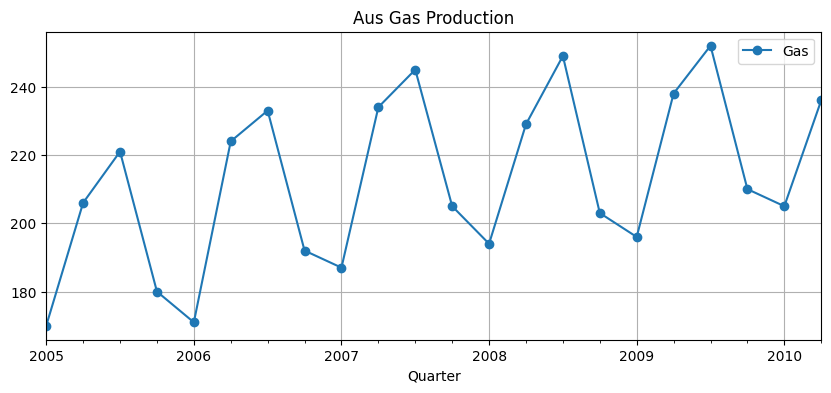

In [55]:
df.plot(y="Gas", grid=2, figsize=(10, 4), title="Aus Gas Production", marker="o");

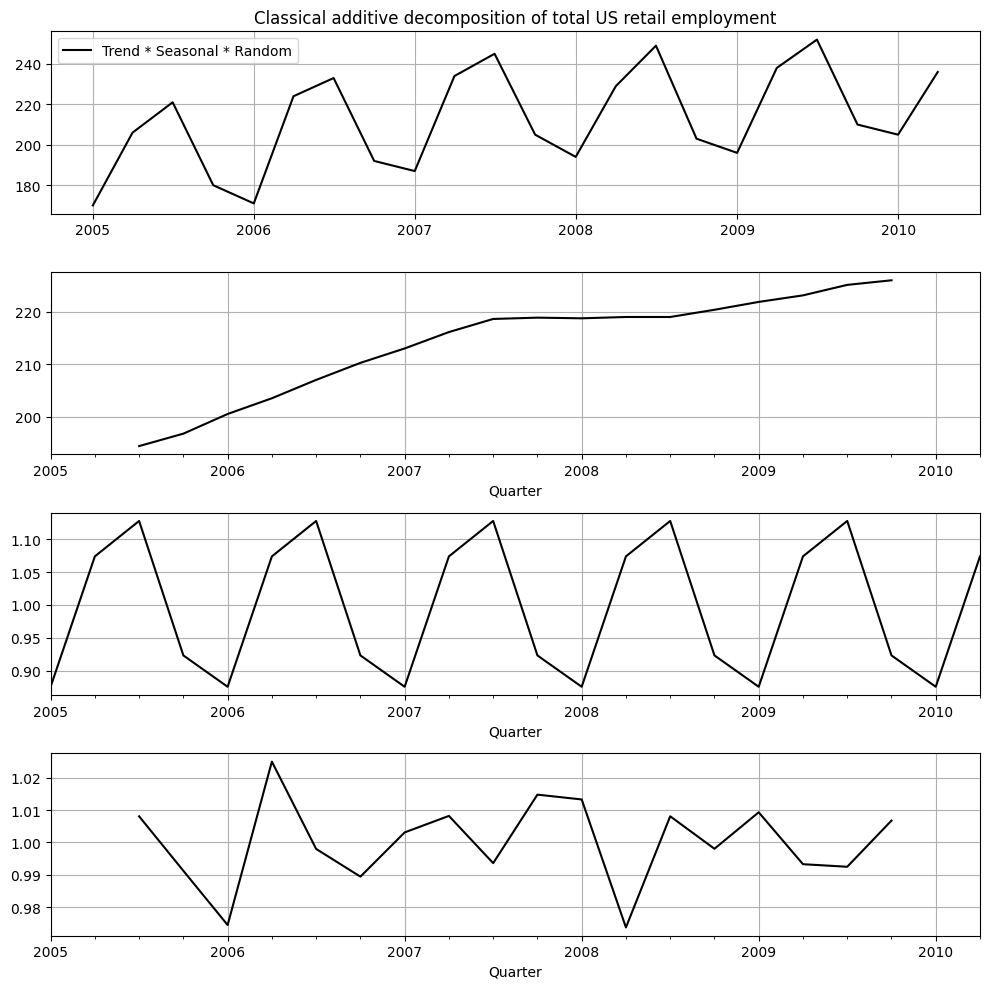

In [64]:
components = seasonal_decompose(
    df["Gas"],
    period=4,
    two_sided=True,
    model='multiplicative', # Decomposição Aditiva
    extrapolate_trend=0,
)

fig, ax = plt.subplots(4, 1, figsize=(10,10))

ax[0].plot(df["Gas"], color="k", label="Trend * Seasonal * Random")
ax[0].set_title("Classical additive decomposition of total US retail employment")
ax[0].legend()

components.trend.plot(ax=ax[1], color="k")
components.seasonal.plot(ax=ax[2], color="k")
components.resid.plot(ax=ax[3], color="k")

for axi in ax: axi.grid(2)

plt.tight_layout()

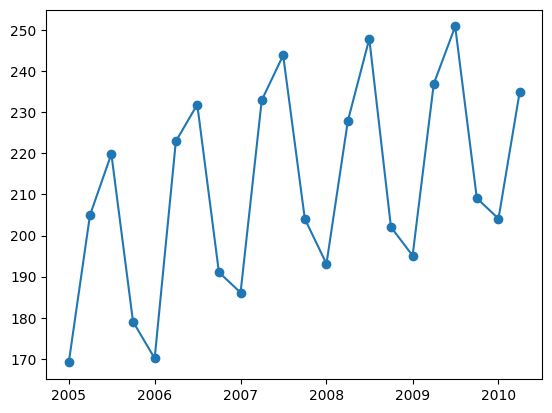

In [72]:
plt.plot(df["Gas"] - components.seasonal, marker="o");

In [86]:
df_outlier = df.copy()

df_outlier.loc[df_outlier.index == "2007-01-01", "Gas"] = 300

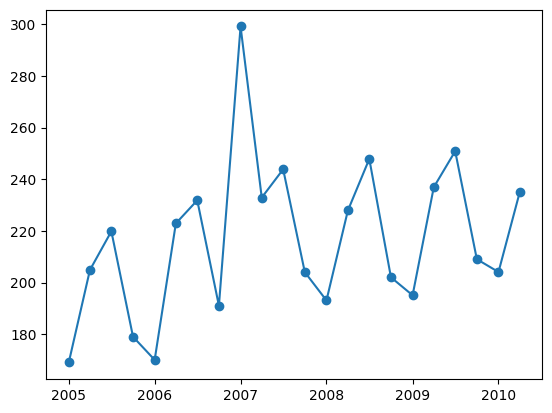

In [87]:
plt.plot(df_outlier["Gas"] - components.seasonal, marker="o");

In [89]:
df_outlier = df.copy()

df_outlier.loc[df_outlier.index == "2010-04-01", "Gas"] = 300

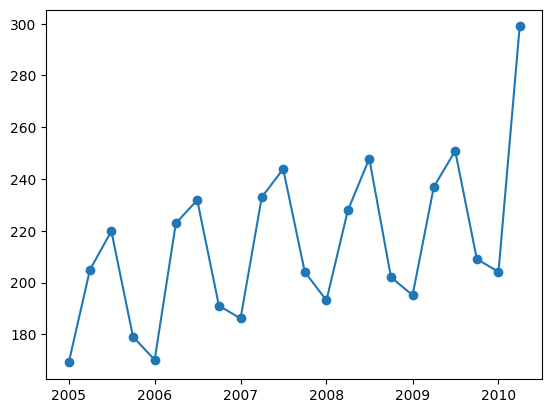

In [90]:
plt.plot(df_outlier["Gas"] - components.seasonal, marker="o");

### 8.0. X-11

X-11

### 9.0. Describe

a. The data presented in the first figure of the graph clearly presents a trend and a certain seasonal aspect with few peaks.
In the decomposition process, it was simple to extract the trend, it was possible to collect a certain seasonality, however, it is clear that the remaining component still had information that the decomposition was unable to recover. Perhaps some minimal transformation in this data just to adjust the scale might correct this problem, however we can still propagate this insufficiency of the decomposition in the transformation if the decomposition model is not ideal.

b. Yes.

### 10.0. Canadian Gas

In [120]:
df = pd.read_csv("../data/canadian_gas.csv", index_col=[0])

df["Month"] = pd.to_datetime(df["Month"], format="%Y %b")

df = df[df["Month"] >= "1970-01-01"]

In [121]:
df["MonthAbbr"] = df["Month"].dt.month.apply(lambda x: month_abbr[x])

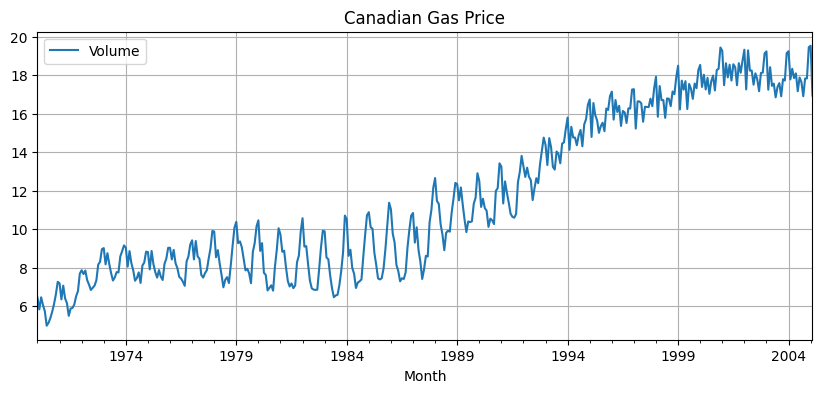

In [122]:
df.plot(
    x="Month", y="Volume",
    grid=2, figsize=(10, 4),
    title="Canadian Gas Price"
);

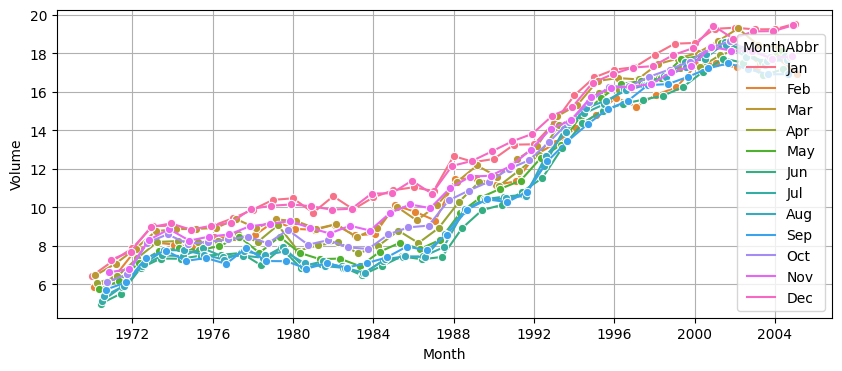

In [123]:
fgi, ax = plt.subplots(figsize=(10,4))
ax.grid(2)
sns.lineplot(df, x="Month", y="Volume", hue="MonthAbbr", marker="o");

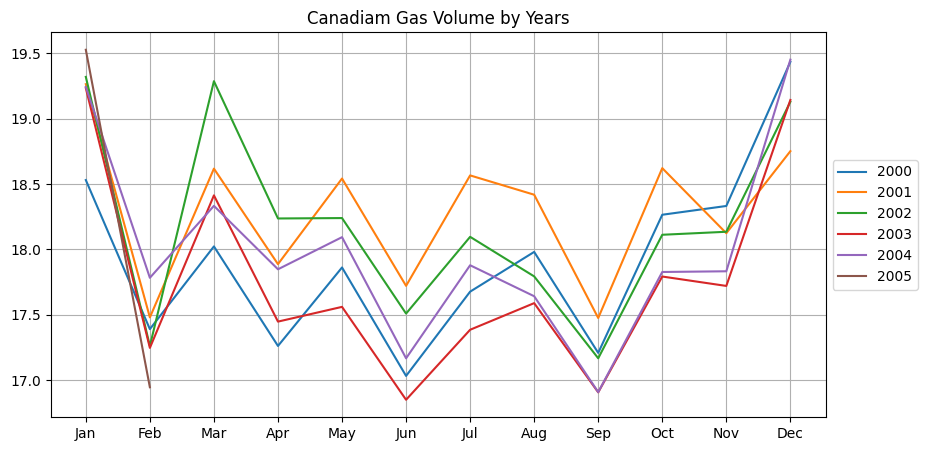

In [116]:
df['month_index'] = df['Month'].dt.month
df['year'] = df['Month'].dt.year

df = df[df["year"] >= 2000]

dfbs_plot = df[['month_index', 'year', 'Volume']].groupby(['year', 'month_index']).sum('Volume').reset_index()
dfbs_plot = dfbs_plot.sort_values(by=['year', 'month_index'])

fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(
    ticks=range(1, len(dfbs_plot.month_index.unique()) + 1), 
    labels=[month_abbr[k] for k in set(dfbs_plot.month_index.unique())]
)

for variable in dfbs_plot['year'].unique():
    aux = dfbs_plot[dfbs_plot['year'] == variable]
    ax.plot(aux['month_index'], aux['Volume'], label=variable)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_title('Canadiam Gas Volume by Years')
ax.grid(2)

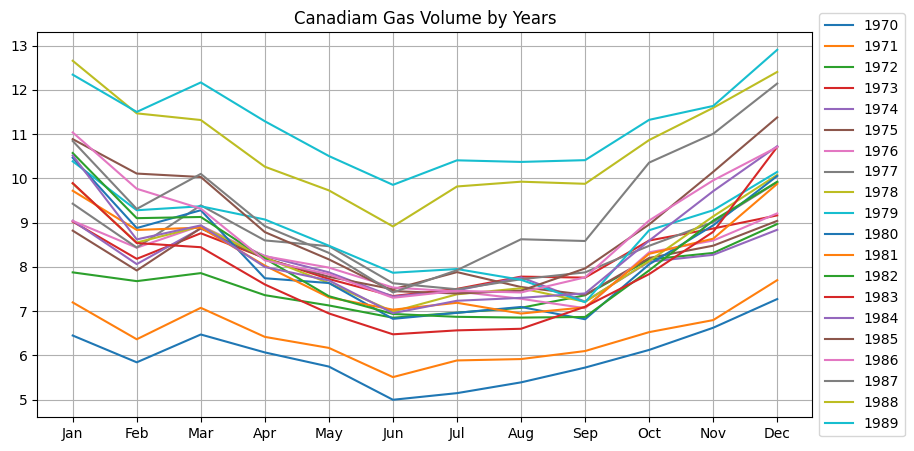

In [141]:
df['month_index'] = df['Month'].dt.month
df['year'] = df['Month'].dt.year

df = df[df["year"] < 1990]
df.reset_index(drop=3, inplace=True)

dfbs_plot = df[['month_index', 'year', 'Volume']].groupby(['year', 'month_index']).sum('Volume').reset_index()
dfbs_plot = dfbs_plot.sort_values(by=['year', 'month_index'])

fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(
    ticks=range(1, len(dfbs_plot.month_index.unique()) + 1), 
    labels=[month_abbr[k] for k in set(dfbs_plot.month_index.unique())]
)

for variable in dfbs_plot['year'].unique():
    aux = dfbs_plot[dfbs_plot['year'] == variable]
    ax.plot(aux['month_index'], aux['Volume'], label=variable)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_title('Canadiam Gas Volume by Years')
ax.grid(2)

In [ ]:
df['month_index'] = df['Month'].dt.month
df['year'] = df['Month'].dt.year

df = df[df["year"] < 2000]
df.reset_index(drop=3, inplace=True)

dfbs_plot = df[['month_index', 'year', 'Volume']].groupby(['year', 'month_index']).sum('Volume').reset_index()
dfbs_plot = dfbs_plot.sort_values(by=['year', 'month_index'])

fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(
    ticks=range(1, len(dfbs_plot.month_index.unique()) + 1), 
    labels=[month_abbr[k] for k in set(dfbs_plot.month_index.unique())]
)

for variable in dfbs_plot['year'].unique():
    aux = dfbs_plot[dfbs_plot['year'] == variable]
    ax.plot(aux['month_index'], aux['Volume'], label=variable)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_title('Canadiam Gas Volume by Years')
ax.grid(2)

In [129]:
stl = STL(
    df.set_index('Month')['Volume'], 
    robust=True, 
    period=12,   # Periodos Sazonais
    seasonal=11, # Smoothing
)


components = stl.fit()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


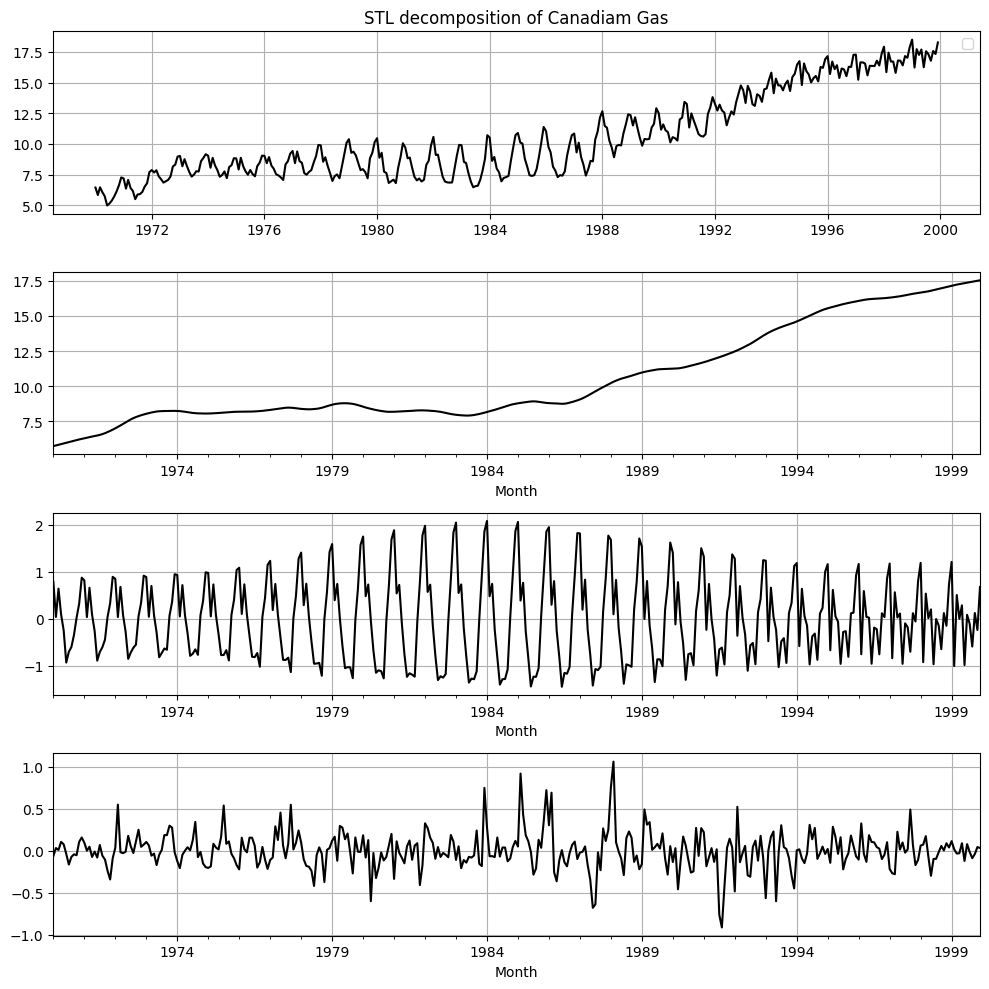

In [130]:
fig, ax = plt.subplots(4, 1, figsize=(10,10))

ax[0].plot(df["Month"], df["Volume"], color="k")
ax[0].set_title("STL decomposition of Canadiam Gas")
ax[0].legend()

components.trend.plot(ax=ax[1], color="k")
components.seasonal.plot(ax=ax[2], color="k")
components.resid.plot(ax=ax[3], color="k")

for axi in ax: axi.grid(2)

plt.tight_layout()

In [139]:
df["seasonal_adj"] = df["Volume"] - components.seasonal.values

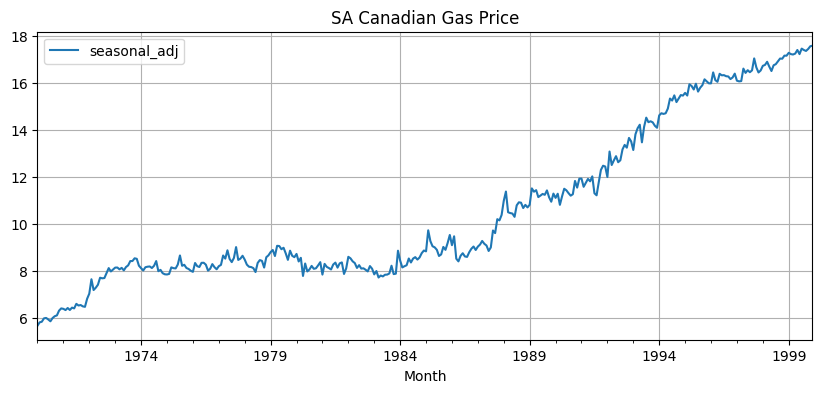

In [140]:
df.plot(
    x="Month", y="seasonal_adj",
    grid=2, figsize=(10, 4),
    title="SA Canadian Gas Price"
);